In [2]:
import tkinter as tk
import numpy as np
import random

l_nid = []
l_source = []

l_alpha = []
l_beta = []

class Route:
    def __init__(self, longueur, pheromone, premiere_ville, seconde_ville):
        self.longueur = longueur
        self.pheromone = pheromone
        self.premiere_ville = premiere_ville
        self.seconde_ville = seconde_ville

    def evaporer_Pheromone(self, taux):
        self.pheromone *= (1 - taux)

    def __str__(self):
        return "Route de {} à {} de longueur {}".format(self.premiere_ville, self.seconde_ville, self.longueur)


class Ville:
    def __init__(self, nom, position):
        self.nom = nom
        self.position = position

    def __str__(self):
        return self.nom


class Ant:
    def __init__(self, alpha: float, beta: float, gamma: float, porte_nourriture: bool, position, id):
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.porte_nourriture = porte_nourriture
        self.memoire = []
        self.position = position
        self.pas = 0
        self.score = 0
        self.id = id
        self.score_max = 0

    def choix_arete(self, villes_voisines, routes):
        ville = None
        coeff = 0.5
        q0 = 0.8
        q = np.random.random()
        VILLE = []
        score = []
        # if len(self.memoire)>1:
        # print(self.memoire[-2:][0])
        # print(self.memoire[-2:][1])
        if q < q0:
            for k in villes_voisines:
                if k not in self.memoire[-2:]:
                    # print(f"Les villes voisines possibles {k}")
                    for route in routes:
                        if k in [route.premiere_ville, route.seconde_ville]:
                            if self.position in [route.premiere_ville, route.seconde_ville]:
                                taux = (route.pheromone)**self.alpha
                                heuristique = (1 / route.longueur)**self.beta
                                if self.position == route.premiere_ville:
                                    VILLE.append(route.seconde_ville)
                                else:
                                    VILLE.append(route.premiere_ville)
                                score.append(taux * (heuristique ** coeff))
            ville = VILLE[np.argmax(score)]
            # for i in VILLE :
            # print(f"LEEEES villes possibles {i}")
            # print(f"LA VILLE {ville}")
        else:
            a = 0
            l = []
            while ville is None and a < len(villes_voisines):
                k = np.random.choice(villes_voisines)
                if k not in self.memoire:
                    ville = k
                if k not in l:
                    l.append(k)
                    a += 1
        if ville is None:
            # print("VILLE IS NONE")
            pass
        else:
            self.memoire.append(ville)
            self.pas = 0
            for route in routes:
                if ville in [route.premiere_ville, route.seconde_ville]:
                    if self.position in [route.premiere_ville, route.seconde_ville]:
                        self.position = route
        # print(f"Je choisis cela : {self.position} pour aller à {ville}")

    def prendre_nourriture(self, nour_source: 0):
        # self.score = 0
        if not self.porte_nourriture:
            self.porte_nourriture = True
            return (nour_source - 1)
        else:
            return (nour_source)

    def laisser_nourriture(self, nour_nid: 0):
        if nour_nid == None:
            nour_nid = 0
        if self.score > self.score_max:
            self.score_max = self.score
        self.score = 0
        if self.porte_nourriture:
            self.porte_nourriture = False
            return (nour_nid + 1)
        else:
            return (nour_nid)

    def deposer_pheromone(self):
        PLt = self.position.pheromone
        # PLt1 = PLt + abs(self.alpha * np.sin(self.beta * PLt + self.gamma))
        PLt1 = PLt + 1/(self.score)
        self.position.pheromone = PLt1

    def marcher(self):
        # print(f"Mon pas : {self.pas}")
        self.pas += 1
        self.score += 1
        if self.pas == self.position.longueur:
            self.position = self.memoire[-1]
            # print(f"Je me situe en {self.position}")
        else:
            self.deposer_pheromone()


class Civilisation:
    def __init__(self, src_nourriture, nid, routes, villes, fourmis, selectionNaturelle):
        # La ville source de nouriture de la Civilisation
        self.src_nourriture = src_nourriture
        self.nid = nid  # Le nid de la Civilisation
        self.routes = routes  # toutes les routes de l’Environement
        self.villes = villes  # toutes les villes de l’Environement
        self.fourmis = fourmis  # toutes les fourmis dans l’Environement
        # les tours restants avant la prochaine sélection (pour l’algorithme génétique)
        self.selectionNaturelle = selectionNaturelle
        self.iteration = 0  # le nombre de pas effectués par les fourmis
        self.nour_nid = 0
        self.nour_source = 1000

    def tourSuivant(self):  # Effectue un tour de la simulation
        # print(f"Je me situe en {self.fourmis[0].position}")
        print('-------')
        print("Nid : ", self.nour_nid)
        print("Source : ", self.nour_source)
        print("Itération :", self.iteration)
        print('-------')

        l_nid.append(self.nour_nid)
        l_source.append(self.nour_source)
        if self.selectionNaturelle > self.iteration:
            for fourmi in self.fourmis:
                villes_voisines = self.villes_voisines(
                    fourmi.position) 
                if fourmi.position == self.src_nourriture:
                    fourmi.memoire = [self.src_nourriture]
                    self.nour_source = fourmi.prendre_nourriture(
                        self.nour_source)
                    fourmi.choix_arete(villes_voisines, self.routes)
                elif fourmi.position == self.nid:
                    fourmi.memoire = [self.nid]
                    self.nour_nid = fourmi.laisser_nourriture(self.nour_nid)
                    # Appelle la méthode 'choix_arete'
                    fourmi.choix_arete(villes_voisines, self.routes)
                elif fourmi.position in self.villes:
                    if not villes_voisines:
                        continue
                    # Appelle la méthode 'choix_arete'
                    fourmi.choix_arete(villes_voisines, self.routes)
                elif fourmi.position in self.routes:
                    fourmi.marcher()
            self.iteration += 1
            for route in self.routes:
                route.evaporer_Pheromone(0.01)
        else:
            id_best_fourmi, id_fourmi_nul = self.evaluation()
            self.crossover(id_best_fourmi, id_fourmi_nul)
            self.iteration = 0

    def villes_voisines(self, ville):
        return [v for v in self.villes if v != ville and
                (ville, v) in [(r.premiere_ville, r.seconde_ville) for r in self.routes] or
                (v, ville) in [(r.premiere_ville, r.seconde_ville) for r in self.routes]]

    def crossover(self, id_best_fourmi, id_fourmi_nul):
        alpha_best = []
        beta_best = []
        for i in range(len(self.fourmis)):
            if i in id_best_fourmi:
                alpha_best.append(self.fourmis[i].alpha)
                beta_best.append(self.fourmis[i].beta)
        # on moyenne
        new_alpha = sum(alpha_best)/len(alpha_best)
        new_beta = sum(beta_best)/len(beta_best)
        for i in range(len(self.fourmis)):
            if i in id_fourmi_nul:
                # on change les paramètres des plus nuls à l'aide des meilleurs paramètres
                e = random.uniform(-3, 3)
                self.fourmis[i].alpha = new_alpha+e
                self.fourmis[i].beta = new_beta+e
        print("mutation effectué, nouvel alpha=" +
              str(new_alpha)+" et nouveau beta="+str(new_beta))
        l_alpha.append(new_alpha)
        l_beta.append(new_beta)

    def evaluation(self):
        # 100 meilleurs et 100 pires
        j = sorted(self.fourmis, key=lambda fourmi: fourmi.score_max)
        id_best_fourmi = []
        id_fourmi_nul = []
        for i in range(100):
            id_best_fourmi.append(j[i].id)
            id_fourmi_nul.append(j[len(j)-1-i].id)
        return (id_best_fourmi, id_fourmi_nul)

In [3]:
# Créer une ville avec nom 'A' et position (0,0)
ville_A = Ville('A', (1, 1))
ville_B = Ville('B', (1, 0))
ville_C = Ville('C', (2, 2))
ville_D = Ville('D', (2, 1))
ville_E = Ville('E', (2, -1))
ville_F = Ville('F', (3, 2))
ville_G = Ville('G', (3, 1))
ville_H = Ville('H', (3, 0))

l_nid = []
l_source = []

l_alpha = []
l_beta = []

nid = Ville('nid', (0, 0))
source = Ville('source', (4, 0))

villes = [ville_A, ville_B, ville_C, ville_D,
          ville_E, nid, source, ville_F, ville_G, ville_H]


route_AB = Route(2, 1, ville_A, ville_B)
routeDepartA = Route(3, 1, nid, ville_A)
routeDepartB = Route(5, 1, nid, ville_B)
route_AC = Route(6, 1, ville_A, ville_C)
route_AD = Route(4, 1, ville_A, ville_D)
route_BD = Route(2, 1, ville_B, ville_D)
route_BE = Route(2, 1, ville_B, ville_E)
route_DArrivee = Route(7, 1, ville_D, source)
route_EH = Route(3, 1, ville_E, ville_H)
route_DG = Route(2, 1, ville_D, ville_G)
route_DH = Route(9, 1, ville_D, ville_H)
route_CF = Route(4, 1, ville_C, ville_F)
route_FG = Route(6, 1, ville_F, ville_G)
route_Hsource = Route(5, 1, ville_H, source)
route_Gsource = Route(2, 1, ville_G, source)

routes = [route_AB, routeDepartA, routeDepartB, route_AC, route_AD, route_BD, route_BE,
          route_DArrivee, route_EH, route_DG, route_DH, route_CF, route_FG, route_Hsource, route_Gsource]

fourmis = []
for i in range(1000):
    alpha = np.random.randint(-5, 5)
    beta = np.random.randint(-5, 5)
    gamma = np.random.randint(-5, 5)
    fourmis.append(Ant(alpha, beta, gamma, False, nid, i))

N = 30

civilisation = Civilisation(source, nid, routes, villes, fourmis, N)
# for i in range(N):
#    civilisation.tourSuivant()


class Application(tk.Frame):
    def __init__(self, master=None, city_coords=None, lignes=None, text_villes=None, text_routes=None, routes=None):
        super().__init__(master)
        self.master = master
        self.city_coords = city_coords
        self.ant_coords = []
        self.lignes = lignes
        self.text_villes = text_villes
        self.text_routes = text_routes
        self.pack()
        self.routes = routes
        self.create_widgets()

    def create_widgets(self):
        # Créer un canvas
        self.canvas = tk.Canvas(self, width=700, height=500)
        self.canvas.pack()

        # Tracer la ville
        if self.city_coords:
            for i in self.city_coords:
                self.canvas.create_oval(
                    i[0]-10, i[1]-10, i[0]+10, i[1]+10, fill="red")

        if self.lignes:
            for i in self.lignes:
                self.canvas.create_line(i[0], i[1], fill="red", width=3)

        # Tracer la fourmi
        if self.ant_coords:
            for i in self.ant_coords:
                self.canvas.create_oval(
                    i[0]-2, i[1]-2, i[0]+2, i[1]+2, fill="black")

        if self.text_villes:
            for i in self.text_villes:
                self.canvas.create_text(
                    i[1][0], i[1][1], text=i[0], font=("Arial", 20))

        if self.text_routes:
            for i in self.text_routes:
                self.canvas.create_text(
                    i[1][0], i[1][1], text=i[0], font=("Arial", 15))

        # Ajouter un bouton en haut au centre
        self.button = tk.Button(self, text="+1 pas", command=self.my_function)
        self.button.pack(side=tk.TOP, pady=10)

        self.button = tk.Button(self, text="+10 pas",
                                command=self.my_function2)
        self.button.pack(side=tk.TOP, pady=10)

        self.button = tk.Button(self, text="+inf", command=self.my_function3)
        self.button.pack(side=tk.TOP, pady=10)

        self.button = tk.Button(self, text="Afficher",
                                command=self.my_function4)
        self.button.pack(side=tk.TOP, pady=10)

    ant_coords = []

    def my_function(self):
        #print('----------------------')
        # for i in self.ant_coords:
        # self.canvas.create_oval(i[0]-2, i[1]-2, i[0]+2, i[1]+2, fill="white")
        civilisation.tourSuivant()
        self.ant_coords = []
        for fourmi in civilisation.fourmis:
            if fourmi.position in civilisation.villes:
                self.ant_coords.append(
                    (fourmi.position.position[0]*100+200, fourmi.position.position[1]*100+200))
            elif fourmi.position in civilisation.routes:
                taux = fourmi.position.longueur-fourmi.pas
                # print(f"memoire {fourmi.memoire[-1]}, premier {fourmi.position.premiere_ville}, deuxième {fourmi.position.seconde_ville}")
                if fourmi.position.premiere_ville == fourmi.memoire[-1]:
                    deuz = fourmi.position.premiere_ville
                    prems = fourmi.position.seconde_ville
                else:
                    deuz = fourmi.position.seconde_ville
                    prems = fourmi.position.premiere_ville
                # print(f"prems {prems} deuz {deuz}")
                self.ant_coords.append((((prems.position[0]*100+200)*taux + (deuz.position[0]*100+200)*fourmi.pas)/fourmi.position.longueur, ((
                    prems.position[1]*100+200)*taux + (deuz.position[1]*100+200)*fourmi.pas)/fourmi.position.longueur))
        # for i in self.ant_coords:
            # self.canvas.create_oval(i[0]-2, i[1]-2, i[0]+2, i[1]+2, fill="black")
        r = []
        for i in self.routes:
            r.append(i.pheromone)
        scale = np.linspace(-0.0001, np.max(r)+0.0001, 8)
        colors = ['#fafa6e', '#fce34c', '#feca2a', '#ffb000',
                  '#ff9400', '#ff7500', '#ff5000', '#ff0000']
        for ii in range(len(self.routes)):
            i = self.text_routes[ii]
            o = self.routes[ii]
            # print(o.pheromone)
            color = 'green'
            # print(o.pheromone > scale[0] and o.pheromone < scale[-1])
            for j in range(7):
                if o.pheromone > scale[j] and o.pheromone < scale[j+1]:
                    color = colors[j]
            ville1X = o.premiere_ville.position[0]*100+200
            ville1Y = o.premiere_ville.position[1]*100+200
            ville2X = o.seconde_ville.position[0]*100+200
            ville2Y = o.seconde_ville.position[1]*100+200
            self.canvas.create_line(
                (ville1X, ville1Y), (ville2X, ville2Y), fill=color, width=3)

            # self.canvas.create_rectangle(i[1][0]+20, i[1][1]+10, i[1][0]-30, i[1][1]+30, fill='white', outline="white")
            # self.canvas.create_text(i[1][0]-10, i[1][1]+20, text=round(o.pheromone,2), font=("Arial", 15))

    def my_function2(self):
        for i in range(10):
            self.my_function()

    def my_function3(self):
        for i in range(3000):
            self.my_function()

    def my_function4(self):
        for ii in range(len(self.routes)):
            i = self.text_routes[ii]
            o = self.routes[ii]
            self.canvas.create_rectangle(
                i[1][0]+20, i[1][1]+10, i[1][0]-30, i[1][1]+30, fill='white', outline="white")
            self.canvas.create_text(
                i[1][0]-10, i[1][1]+20, text=round(o.pheromone, 2), font=("Arial", 15))


# Exemple d'utilisation
if __name__ == "__main__":
    city_coords = []
    for ville in villes:
        city_coords.append(
            (ville.position[0]*100+200, ville.position[1]*100+200))
    lignes = []
    for ville in villes:
        for route in routes:
            if ville == route.premiere_ville:
                lignes.append(((ville.position[0]*100+200, ville.position[1]*100+200), (
                    route.seconde_ville.position[0]*100+200, route.seconde_ville.position[1]*100+200)))
            elif ville == route.seconde_ville:
                lignes.append(((ville.position[0]*100+200, ville.position[1]*100+200), (
                    route.premiere_ville.position[0]*100+200, route.premiere_ville.position[1]*100+200)))
    text_villes = []
    for ville in villes:
        text_villes.append(
            (ville.nom, (ville.position[0]*100+200, ville.position[1]*100+180)))
    text_routes = []
    for route in routes:
        text_routes.append((route.longueur, ((route.premiere_ville.position[0]*100+200+route.seconde_ville.position[0]*100+220)/2, (
            route.premiere_ville.position[1]*100+200+route.seconde_ville.position[1]*100+200)/2)))

    root = tk.Tk()
    app = Application(master=root, city_coords=city_coords, lignes=lignes,
                      text_villes=text_villes, text_routes=text_routes, routes=routes)
    app.mainloop()


-------
Nid :  0
Source :  1000
Itération : 0
-------
-------
Nid :  0
Source :  1000
Itération : 1
-------
-------
Nid :  0
Source :  1000
Itération : 2
-------
-------
Nid :  0
Source :  1000
Itération : 3
-------
-------
Nid :  0
Source :  1000
Itération : 4
-------
-------
Nid :  0
Source :  1000
Itération : 5
-------
-------
Nid :  0
Source :  1000
Itération : 6
-------
-------
Nid :  0
Source :  1000
Itération : 7
-------
-------
Nid :  0
Source :  1000
Itération : 8
-------
-------
Nid :  0
Source :  1000
Itération : 9
-------
-------
Nid :  0
Source :  1000
Itération : 10
-------
-------
Nid :  0
Source :  1000
Itération : 11
-------
-------
Nid :  0
Source :  1000
Itération : 12
-------
-------
Nid :  0
Source :  1000
Itération : 13
-------
-------
Nid :  0
Source :  1000
Itération : 14
-------
-------
Nid :  0
Source :  1000
Itération : 15
-------
-------
Nid :  0
Source :  980
Itération : 16
-------
-------
Nid :  0
Source :  946
Itération : 17
-------
-------
Nid :  0
Sourc

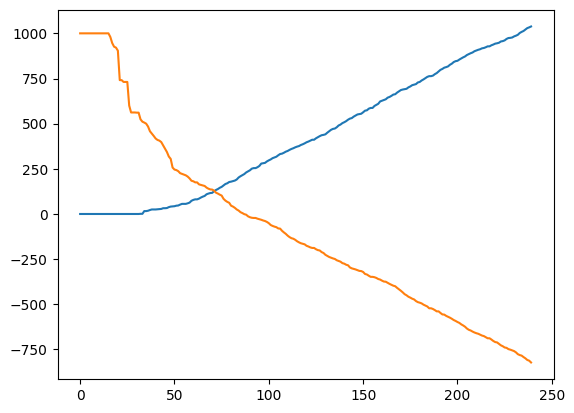

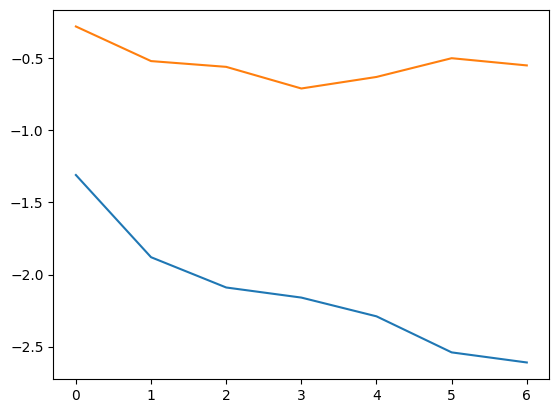

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(l_nid)
plt.plot(l_source)
plt.show()

plt.plot(l_alpha)
plt.plot(l_beta)
plt.show()